In [1]:
!pip install --upgrade pip setuptools
!pip install matplotlib

In [3]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [5]:
from functools import partial
from keras import backend as K
from keras import callbacks
from sklearn.metrics import auc, classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses, models
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model

In [7]:
folds = pd.read_csv("/Users/renitalewis/Downloads/archive/Folds.csv")
df = pd.DataFrame(folds.iloc[:7909])
df["label"] = df["filename"].apply(lambda x: x.split("/")[3])
df['label'] = df['label'].str.strip()

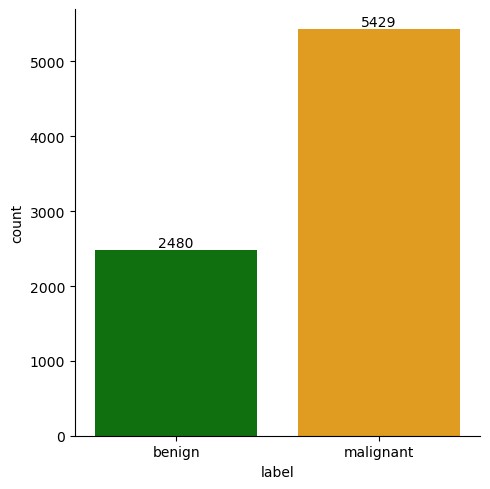

In [9]:
g = sns.catplot(x="label", data=df, kind="count", hue="label", palette=['green', 'orange'], legend=False)
for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container)
plt.show()

In [11]:
df['label_int'] = df.label.apply(lambda x: ['benign', 'malignant'].index(x))
X_train, X_test, y_train, y_test = train_test_split(df["filename"], df["label_int"], test_size=0.2, random_state=42)

In [13]:
train_loader = tf.data.Dataset.from_tensor_slices(("/Users/renitalewis/Desktop/ProjectFolder/archive/BreaKHis_v1/" + X_train, y_train))
test_loader = tf.data.Dataset.from_tensor_slices(("/Users/renitalewis/Desktop/ProjectFolder/archive/BreaKHis_v1/" + X_test, y_test))

def parse_image(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels=3)
    return img, label

def resize_rescale(image, label):
    img = tf.cast(image, tf.float32)
    img = tf.image.resize(img, [64, 64]) / 255.0
    return img, label


In [15]:
X_trainset = train_loader.shuffle(len(X_train)).map(parse_image).map(resize_rescale).batch(64)
X_testset = test_loader.shuffle(len(X_test)).map(parse_image).map(resize_rescale).batch(64)

2024-07-10 05:11:18.443491: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


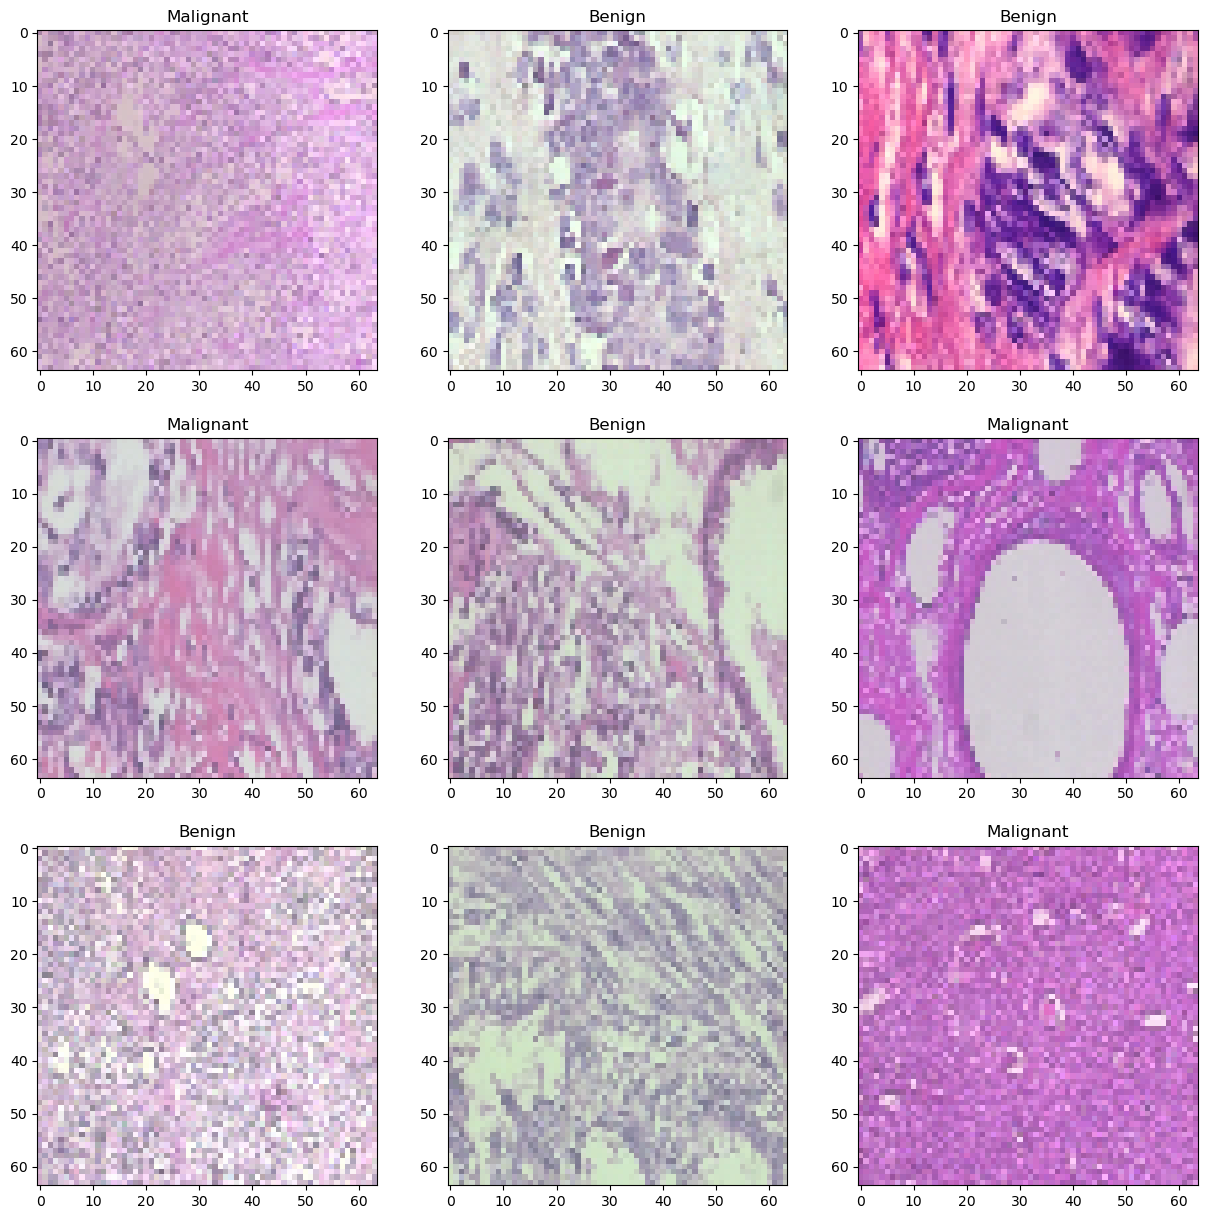

In [17]:
fig = plt.figure(figsize=(15, 15))
for i, img in enumerate(X_trainset.take(9)):
    ax = fig.add_subplot(3, 3, i+1)
    if tf.keras.backend.get_value(img[1][i]) == 0:
       ax.title.set_text("Benign")
    else:
       ax.title.set_text("Malignant")
    plt.imshow(img[0][i])
plt.show()

In [19]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [29]:
X_train_features = []
y_train_labels = []
for img, label in X_trainset:
    features = base_model.predict(img)
    X_train_features.append(features)
    y_train_labels.extend(label.numpy())

X_train_features = np.concatenate(X_train_features, axis=0)
y_train_labels = np.array(y_train_labels)

X_test_features = []
y_test_labels = []
for img, label in X_testset:
    features = base_model.predict(img)
    X_test_features.append(features)
    y_test_labels.extend(label.numpy())

X_test_features = np.concatenate(X_test_features, axis=0)
y_test_labels = np.array(y_test_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 300ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 274ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 283ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 337ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 277ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 394ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 267ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 272ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 239ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 327ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 304ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 267ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 285ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 272ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 

2024-07-10 05:19:26.749717: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 324ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 280ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 261ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 285ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 273ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 297ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 287ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 288ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


2024-07-10 05:19:42.299348: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [33]:
X_train_features_flat = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_features_flat = X_test_features.reshape(X_test_features.shape[0], -1)

In [35]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_features_flat, y_train_labels)

In [37]:
unique, counts = np.unique(y_train_resampled, return_counts=True)
print("Class distribution after oversampling:", dict(zip(unique, counts)))

Class distribution after oversampling: {0: 4357, 1: 4357}


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test_features_flat = scaler.transform(X_test_features_flat)

In [41]:
model = Sequential([
    Input(shape=(X_train_resampled.shape[1],)),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [43]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
EPOCHS = 100
history = model.fit(X_train_resampled, y_train_resampled, epochs=EPOCHS, validation_data=(X_test_features_flat, y_test_labels))

Epoch 1/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6739 - loss: 0.6083 - val_accuracy: 0.7509 - val_loss: 0.5096
Epoch 2/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7697 - loss: 0.4891 - val_accuracy: 0.7636 - val_loss: 0.4988
Epoch 3/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7973 - loss: 0.4476 - val_accuracy: 0.7358 - val_loss: 0.5399
Epoch 4/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8139 - loss: 0.4084 - val_accuracy: 0.7579 - val_loss: 0.5302
Epoch 5/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8317 - loss: 0.3739 - val_accuracy: 0.7566 - val_loss: 0.5364
Epoch 6/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8497 - loss: 0.3443 - val_accuracy: 0.7522 - val_loss: 0.5667
Epoch 7/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8691 - loss: 0.3194 - val_accuracy: 0.7649 - val_loss: 0.5738
Epoch 8/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8786 - loss: 0.2986 - 

In [49]:
loss, accuracy = model.evaluate(X_test_features_flat, y_test_labels)
print(f"Test Accuracy: {accuracy}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7685 - loss: 2.4861
Test Accuracy: 0.771175742149353


In [51]:
y_pred = model.predict(X_test_features_flat)
y_pred = (y_pred > 0.5).astype(int)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [53]:
print(f"Predicted labels: {np.unique(y_pred, return_counts=True)}")
print(f"True labels: {np.unique(y_test_labels, return_counts=True)}")

Predicted labels: (array([0, 1]), array([ 466, 1116]))
True labels: (array([0, 1]), array([ 510, 1072]))


In [55]:
print(classification_report(y_test_labels, y_pred))
conf_mat = confusion_matrix(y_test_labels, y_pred)
print("Confusion Matrix:\n", conf_mat)

              precision    recall  f1-score   support

           0       0.66      0.60      0.63       510
           1       0.82      0.85      0.83      1072

    accuracy                           0.77      1582
   macro avg       0.74      0.73      0.73      1582
weighted avg       0.77      0.77      0.77      1582

Confusion Matrix:
 [[307 203]
 [159 913]]


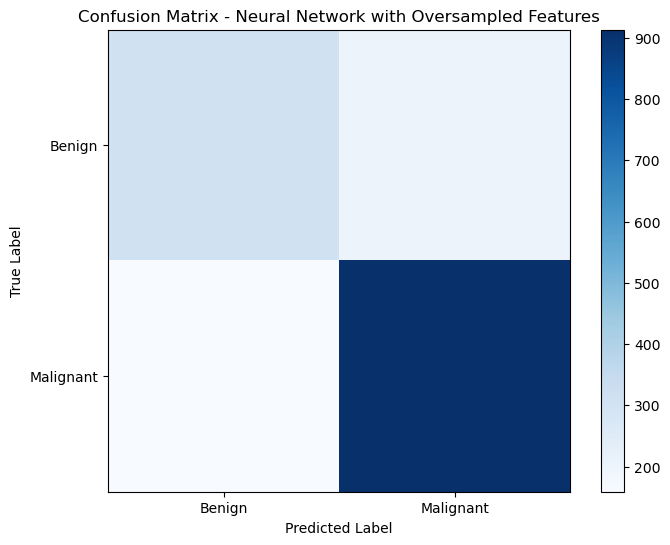

In [57]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Neural Network with Oversampled Features')
plt.colorbar()
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.yticks([0, 1], ['Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


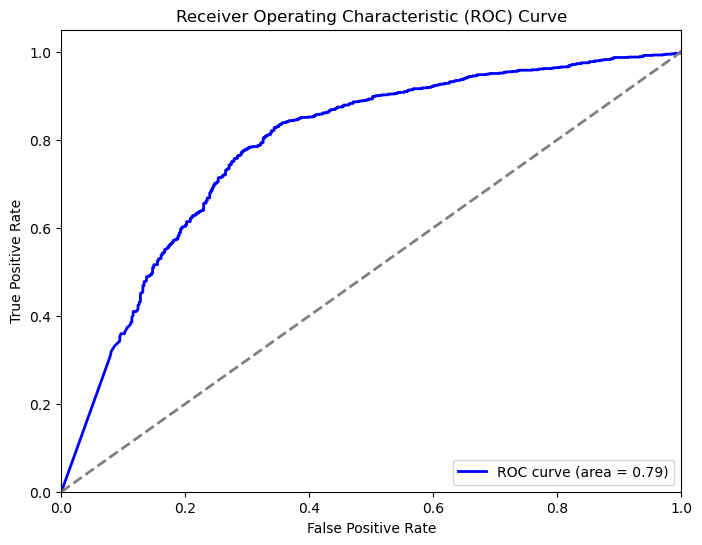

In [59]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test_labels, model.predict(X_test_features_flat))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
